In [5]:
import numpy as np
import matplotlib.pyplot as plt
from cblearn.embedding import SOE
from sklearn.model_selection import validation_curve

from analyse_embeddings import SUBJ_LIST, SUBJ_NAME, get_trial_df, preprocess_queries
import seaborn as sb
import matplotlib

font = {'family' : 'Helvetica',
        #'sans-serif': ['Helvetica'],
        'weight' : 'normal',
        'size'   : 8}

matplotlib.rc('font', **font)

matplotlib.rc('font', **font)
matplotlib.rc('axes.spines',right=False)
matplotlib.rc('axes.spines',top=False)
matplotlib.rc('axes',edgecolor='black')
matplotlib.rc('xtick',color='black',bottom=True)
matplotlib.rc('ytick',color='black',left=True)



### COLOR definitions ###
#colors of undistorted and distorted mesh
color_undist = np.array([0,105,170])/255
color_dist = np.array([200,80,60])/255

# for yaw, pitch and roll
colors_ypr = [ np.array([210,150,0])/255,
               np.array([80,170,200])/255,
               np.array([175,110,150])/255]

# for undistorted, add 1 add 3
colors_add1 =  np.array([50,110,30])/255
colors_add3 =  np.array([200,80,60])/255

colors_add1 = sb.blend_palette(['#214017','#326e1e','#4ad41c'],13)
colors_add3 = sb.blend_palette(['#994738','#ee5c43','#ed8e7d'],13)
colors = sns.color_palette("gray", 2)


In [6]:
def plot_validation_curve(queries, label):
    param_range = [1, 2, 3]
    lw = 2
    
    train_scores, test_scores = validation_curve(SOE(n_components=1, n_init=10), queries, y=None, cv=10, n_jobs=-1,
                                                 param_name="n_components", param_range=param_range)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.title(f"Subject {label}")
    plt.plot(
        param_range, train_scores_mean, label="Training", color=colors[0], lw=lw
    )
    plt.fill_between(
        param_range,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.2,
        color=colors[0],
        lw=lw,
    )
    plt.plot(
        param_range, test_scores_mean, label="Validation", color=colors[1], lw=lw
    )
    plt.fill_between(
        param_range,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.2,
        color=colors[1],
        lw=lw,
    )

Starting with subject: 3
Starting with subject: 4
Starting with subject: 5
Starting with subject: 7
Starting with subject: 8
Starting with subject: 9
Starting with subject: 10
Starting with subject: 11
Starting with subject: 12
Starting with subject: 13
Starting with subject: 14
Starting with subject: 15
Starting with subject: 16


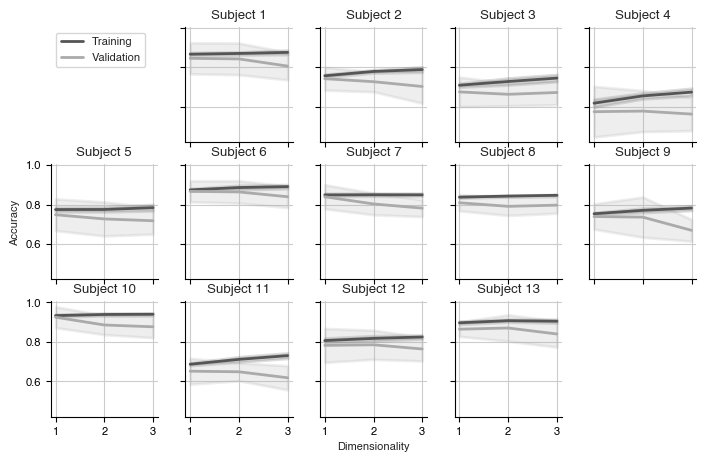

In [9]:
cm = 1/2.54
fig, axs = plt.subplots(3, 5, sharex=True, sharey=True, figsize=(18.0*cm, 18.0/1.62*cm))
plt.tight_layout()
# big axis for common labels
bigax = fig.add_subplot(111, frameon=False)
#bigax.set_xticks([])
#bigax.set_yticks([])
bigax.grid(False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Dimensionality")
plt.ylabel("Accuracy")

for subj, ax in zip(SUBJ_LIST, axs.flat[1:]):
    print("Starting with subject: " + str(subj))
    data = get_trial_df(subj)
    objects, queries = preprocess_queries(data)
    plt.sca(ax)
    plot_validation_curve(queries, SUBJ_NAME[subj])
fig.delaxes(axs.flat[0])
for ax in axs.flat[(1 + len(SUBJ_LIST)):]:
    fig.delaxes(ax)
handles, labels = axs.flat[1].get_legend_handles_labels()
bigax.legend(handles=handles, labels=labels, loc='upper left')
plt.savefig('embedding_dimensionality.svg', bbox_inches = 'tight', pad_inches = 0)